In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import c as np
import csv
import nltk
import re
import string

In [2]:
Trainingtable = pd.read_csv('C:/Users/sergiojesus/Desktop/Recursos/comments_toxicos/Dados/train.csv')

In [3]:
print(Trainingtable.count())
Trainingtable

id               159571
comment_text     159571
toxic            159571
severe_toxic     159571
obscene          159571
threat           159571
insult           159571
identity_hate    159571
dtype: int64


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [31]:
label_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [3]:
num_rows = Trainingtable.shape[0] #Número de linhas
num_missing = num_rows - Trainingtable.count()
print(num_missing) #Número de NaN por coluna

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [4]:
print(Trainingtable.toxic.value_counts(dropna=False)) # Print da ocorrência de valores numa dada coluna

0    144277
1     15294
Name: toxic, dtype: int64


In [5]:
Trainingtable.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
subset = Trainingtable.iloc[[42, 44], [3]]
subset

In [6]:
Trainingtable.groupby('toxic').mean()

,severe_toxic,obscene,threat,insult,identity_hate
toxic,,,,,
0,0.000000,0.003625,0.000201,0.003694,0.000714
1,0.104289,0.518242,0.029358,0.480188,0.085131


   Para qualquer feature, P(toxic|feature = true) = 93%, excepto P(toxic|severe_toxic = true) = 100 %  
   P(toxic)= 9,5844%  


In [46]:
summ = (Trainingtable.toxic + Trainingtable.severe_toxic + Trainingtable.obscene + Trainingtable.insult +
        Trainingtable.threat + Trainingtable.identity_hate) #Somatório de todas as características negativas

In [8]:
Trainingtable['sum']= (summ) #adicionar nova coluna à tabela de treino

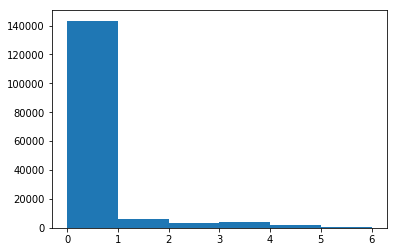

In [9]:
plt.hist(Trainingtable['sum'], bins = 6)
plt.show() #histograma da soma de características negativas

In [10]:
Trainingtable['sum'].describe()

count    159571.000000
mean          0.219952
std           0.748260
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: sum, dtype: float64

In [ ]:
summ6 = summ[summ == 6]
for i in summ6.index:
    print(Trainingtable['comment_text'][i])  #Print dos comentários que infringem todas as  para ver padrões

In [11]:
comments = Trainingtable['comment_text'] #Criação de uma pandas.Series dos comentários
uppercasecount = pd.Series() #Criação do contador em forma de pandas.Series
for i in range(comments.shape[0]): 
    comment = comments[i]
    count = 0
    for c in comment:
        if c.isupper():
            count += 1 #Programado intuitivamente, não tem compreensão de listas
    uppercasecount = uppercasecount.append(pd.Series([count], index = [i])) 

In [12]:
Trainingtable['uppercase_count'] = uppercasecount #Inserir o número de maiúsculas por comentário na tabela de treino

In [13]:
Trainingtable[['sum','uppercase_count']].groupby('sum').mean()

,uppercase_count
sum,
0,14.236993
1,32.999686
2,26.932471
3,36.530767
4,106.406818
5,124.948052
6,149.064516


In [14]:
with open('C:/Users/sergiojesus/Desktop/Recursos/comments_toxicos/full-list-of-bad-words-banned-by-google.csv') as f:
  reader = csv.reader(f)
  swearsBoW = list(reader)
for i in range(1,len(swearsBoW)):
    for word in swearsBoW[i]:
            swearsBoW[0].append(word)
swearsBoW = swearsBoW[0]
newlist= list()
for word in swearsBoW:
    newword = word.strip()
    newword2 = newword.lower()
    newlist.append(newword2)
swearsBoW = newlist

In [17]:
swear_count = pd.Series()
wordlist = [comment.split() for comment in comments]
commentcount = 0
for sentence in wordlist:
    count = 0
    for word in sentence:
        lowerword = word.lower()
        if lowerword in swearsBoW:
            count += 1
    swear_count = swear_count.append(pd.Series([count], index = [commentcount]))
    commentcount += 1
    f.value = commentcount

In [51]:
Trainingtable['swear_count'] = swear_count

In [24]:
Trainingtable[['sum','swear_count']].groupby('sum').mean()

,swear_count
sum,
0,0.032760
1,0.860063
2,0.890805
3,2.735329
4,8.229545
5,10.155844
6,5.258065


In [26]:
Trainingtable['uppercase_count'].describe()

count    159571.000000
mean         17.159628
std          96.528103
min           0.000000
25%           3.000000
50%           7.000000
75%          15.000000
max        4960.000000
Name: uppercase_count, dtype: float64

In [21]:
# Tentativa de criação de um Bag of Words para os comentários todos
#Sem compreensão de listas por enquanto
BagofWords = dict() 
commentcount = 0
for comment in wordlist:
    for word in comment:
        BagofWords[word.lower()] = 0
    commentcount += 1
    f.value = commentcount/2
for comment in wordlist:
    for word in comment:
        BagofWords[word.lower()] += 1
    commentcount += 1
    f.value = commentcount/2

In [16]:
from ipywidgets import FloatProgress
from IPython.display import display
f = FloatProgress(min=0, max=159570)
display(f)

A Jupyter Widget

In [ ]:
BagofWords #ainda tem pontuação, palavras com 1 char, etc.

In [34]:
with open('C:/Users/sergiojesus/Desktop/Recursos/comments_toxicos/full-list-of-bad-words-banned-by-google.csv') as f:
  reader = csv.reader(f)
  swearsBoW1 = list(reader)

In [47]:
swearsBoW1 = [nltk.word_tokenize(a) for a in swearsBoW]

In [65]:
CommentTokens = [nltk.word_tokenize(a) for a in comments]
CommentTokens = [item for sublist in CommentTokens for item in sublist] #itertools.chain para o mesmo resultado

In [62]:
swearsTokens = [a for b in swearsBoW1 for a in b]

In [48]:
lens = Trainingtable.comment_text.str.len()

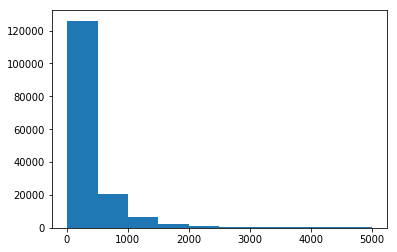

In [30]:
plt.hist(lens)
plt.show()

In [76]:
swear = list()
for i in Trainingtable.swear_count:
    if i > 0:
        swear.append(1)
    else:
        swear.append(0)

In [78]:
Trainingtable['swear'] = swear

In [79]:
Trainingtable

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum,uppercase_count,swear_count,swear
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,17,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,8,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,4,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,11,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,2,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,1,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,37,2,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0,4,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0,7,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0,2,0,0


In [81]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
print(type(re_tok))

<class '_sre.SRE_Pattern'>


In [89]:
help(re_tok.sub)

Help on built-in function sub:

sub(repl, string, count=0) method of _sre.SRE_Pattern instance
    Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl.



In [96]:
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
tokenize("do not")

['do', 'not']

In [97]:
help(TfidfVectorizer)

NameError: name 'TfidfVectorizer' is not defined